# Testing Visualizations

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\12-2023 World Happiness'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_data_cleaned_5.csv'))

In [5]:
df.shape

(790, 11)

In [6]:
df.head()

,Country,Year,Happiness_Score,GDP_Per_Capita,Social_Support,Health_Life_Expectancy,Freedom_Life_Choices,Generosity,Perceptions_of_Corruption,Region,Happiness_Rank
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,Western Europe,1
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,Western Europe,2
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,Western Europe,3
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,Western Europe,4
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,North America,5


# Data Cleaning

In [7]:
# Drop Categorical Columns
features_for_clustering = df.drop(['Country', 'Region', 'Year', 'Happiness_Rank'], axis=1)

In [8]:
df = features_for_clustering

In [9]:
df.head()

,Happiness_Score,GDP_Per_Capita,Social_Support,Health_Life_Expectancy,Freedom_Life_Choices,Generosity,Perceptions_of_Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


# Standardizing the Scale
# This step ensures that all numerical features have a similar scale, which is important for the k-means algorithm.

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows of the standardized DataFrame
df_standardized.head()

,Happiness_Score,GDP_Per_Capita,Social_Support,Health_Life_Expectancy,Freedom_Life_Choices,Generosity,Perceptions_of_Corruption
0,1.966124,1.234953,0.868709,1.392862,1.692148,0.670786,2.864791
1,1.943213,1.002852,1.035157,1.418816,1.448522,1.842080,0.161153
2,1.913252,1.059922,0.903659,1.122431,1.584966,1.045294,3.484434
3,1.908846,1.388940,0.810112,1.165228,1.719688,1.092307,2.332961
4,1.825132,1.061918,0.783781,1.247909,1.476328,2.025178,1.988511


# Use the Elbow Technique
### Let's apply the elbow technique to determine the optimal number of clusters for k-means. We'll fit the k-means algorithm for different values of k and observe the change in the sum of squared distances (inertia) for each k.



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

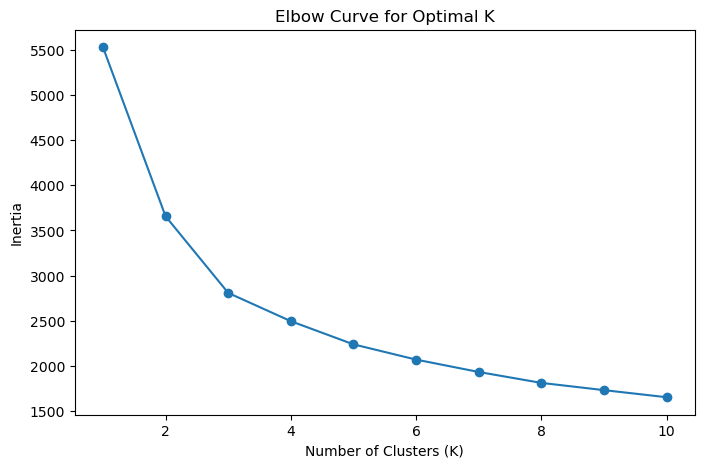

In [11]:
# Define the range of potential clusters in the data
num_clusters_range = range(1, 11)

# Fit k-means clusters for each value of k
kmeans_models = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in num_clusters_range]
inertia_values = [model.fit(df_standardized).inertia_ for model in kmeans_models]

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# The inertia slows down at "4" so we should choose this as our number of clusters

In [13]:
print(df_standardized.columns)


Index(['Happiness_Score', 'GDP_Per_Capita', 'Social_Support',
       'Health_Life_Expectancy', 'Freedom_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption'],
      dtype='object')


In [ ]:
# Scatterplot
sns.scatterplot(x='GDP_Per_Capita', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of GDP Per Capita vs Happiness Score by Cluster')
plt.show()

# Understanding Each Cluster

In [ ]:
cluster_stats = df_standardized.groupby('Cluster_Labels').mean()

In [ ]:
cluster_stats.head()

In [ ]:
import plotly.express as px

# Assuming cluster_stats is your DataFrame with a 'Cluster_Labels' column
fig = px.parallel_coordinates(cluster_stats.reset_index(), color="Cluster_Labels",
                              dimensions=["Happiness_Score", "GDP_Per_Capita", "Social_Support",
                                          "Health_Life_Expectancy", "Freedom_Life_Choices",
                                          "Generosity", "Perceptions_of_Corruption"],
                              color_continuous_scale=px.colors.qualitative.Set1,
                              title="Cluster Comparison: Happiness Variables")

# Show the plot
fig.show()


## Cluster 0: (Above Average)

#### Happiness Score: 0.515326
#### GDP Per Capita: 0.409762
#### Social Support: 0.578578
#### Health Life Expectancy: 0.499425
#### Freedom Life Choices: 0.458883
#### Generosity: -0.180043
#### Perceptions of Corruption: -0.349706
### This cluster seems to represent countries with moderate to high happiness scores, GDP per capita, social support, and health life expectancy. However, there's a lower level of generosity and higher perceived corruption.

## Cluster 1: (Well Below Average)

#### Happiness Score: -1.031525
#### GDP Per Capita: -1.177038
#### Social Support: -0.878209
#### Health Life Expectancy: -1.171372
#### Freedom Life Choices: -0.364310
#### Generosity: 0.282427
#### Perceptions of Corruption: -0.042932
### Cluster 1 appears to represent countries with low scores across all variables, particularly in happiness, GDP per capita, social support, and health life expectancy. However, there is a higher level of generosity compared to other clusters.

## Cluster 2: (Below Average)

#### Happiness Score: -0.269712
#### GDP Per Capita: 0.236284
#### Social Support: -0.172894
#### Health Life Expectancy: 0.261737
#### Freedom Life Choices: -0.911624
#### Generosity: -0.663830
#### Perceptions of Corruption: -0.525385
### Cluster 2 seems to represent countries with below-average happiness scores, moderate GDP per capita, and health life expectancy. There's a lower level of social support and freedom, and a significant decrease in generosity.

## Cluster 3: (Well Above Average)

#### Happiness Score: 1.503452
#### GDP Per Capita: 1.270549
#### Social Support: 0.852770
#### Health Life Expectancy: 1.001482
#### Freedom Life Choices: 1.176132
#### Generosity: 0.866322
#### Perceptions of Corruption: 1.780191
### Cluster 3 represents countries with high happiness scores, GDP per capita, social support, and health life expectancy. There's also a high level of freedom, generosity, and a significant increase in perceived corruption compared to other clusters.

# Overall Interpretation:

### Cluster 3 seems to represent the happiest and most prosperous countries.
### Cluster 0 represents moderately happy countries with some concerns about corruption.
### Cluster 2 includes countries with below-average happiness and challenges in social support and freedom.
### Cluster 1 represents the least happy countries but with a higher level of generosity.

In [ ]:
# Scatterplot
sns.scatterplot(x='Social_Support', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Social Support vs Happiness Score by Cluster')
plt.show()

In [ ]:
# Scatterplot
sns.scatterplot(x='Health_Life_Expectancy', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Health Life Expectancy vs Happiness Score by Cluster')
plt.show()

In [ ]:
# Scatterplot
sns.scatterplot(x='Freedom_Life_Choices', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Freedom Life Choices vs Happiness Score by Cluster')
plt.show()

In [ ]:
# Scatterplot
sns.scatterplot(x='Generosity', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Generosity vs Happiness Score by Cluster')
plt.show()

In [ ]:
# Scatterplot
sns.scatterplot(x='Perceptions_of_Corruption', y='Happiness_Score', hue='Cluster_Labels', data=df_standardized, palette='viridis')
plt.title('Scatterplot of Perceptions of Corruption vs Happiness Score by Cluster')
plt.show()

# Pairplot

In [ ]:
# Plot pairplot colored by clusters
sns.pairplot(df_standardized, hue='Cluster_Labels', palette='viridis', diag_kind='kde')
plt.show()

# Random Forest  Model to Determine Variable Importance towards Happiness

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# df_standardized contains the standardized features and happiness score
X = df_standardized.drop(columns=['Happiness_Score', 'Cluster_Labels'])
y = df_standardized['Happiness_Score']

# Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(sorted_feature_importance)

In [ ]:
import plotly.express as px

# Assuming sorted_feature_importance is your DataFrame
fig = px.bar(sorted_feature_importance, x='Importance', y='Feature', orientation='h',
             title='Feature Importance in Predicting Happiness Score',
             labels={'Importance': 'Importance', 'Feature': 'Feature'})

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Importance',
    yaxis_title='Feature',
    yaxis_categoryorder='total ascending',  # Order features by total importance
    autosize=False,
    width=800,
    height=500
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Create a treemap
fig = px.treemap(
    sorted_feature_importance,
    path=['Feature'],
    values='Importance',
    title='Feature Importance in Predicting Happiness Score',
    color='Importance',
    color_continuous_scale='blues'
)

# Show the treemap
fig.show()

# Feature Interactions

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
# Train Random Forest Model:
X = df_standardized.drop(columns=['Happiness_Score', 'Cluster_Labels'])
y = df_standardized['Happiness_Score']

In [ ]:
# Train a Random Forest model on the standardized data:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Generate SHAP Values

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.summary_plot(shap_values, X)

# Merge Clusters back into the Original Dataframe

In [ ]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_data_cleaned_5.csv'))

In [ ]:
df.head()

In [ ]:
df_standardized.head()

In [ ]:
# Concatenate the Cluster_Labels column to the original DataFrame
merged_df = pd.concat([df, df_standardized['Cluster_Labels']], axis=1)

# Display the merged DataFrame
print(merged_df.head())

In [ ]:
merged_df.head()

In [ ]:
# Based on our insights on the clusters, we will create a new column "Cluster_Names"

# Define the mapping of cluster labels to new names
cluster_names = {
    0: 'Above Average',
    1: 'Well Below Average',
    2: 'Below Average',
    3: 'Well Above Average'
}

# Create a new column with cluster names
merged_df['Cluster_Names'] = merged_df['Cluster_Labels'].map(cluster_names)
merged_df.head()

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot of the distribution of countries across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_Names', data=merged_df, order=['Below Average', 'Above Average', 'Well Below Average', 'Well Above Average'], palette='viridis')
plt.title('Distribution of Countries Across Clusters')
plt.xlabel('Cluster Names')
plt.ylabel('Number of Countries')
plt.show()

In [ ]:
# Create a DataFrame with the count of each cluster name for each region
cluster_counts = merged_df.groupby(['Region', 'Cluster_Names']).size().unstack(fill_value=0).reset_index()

# Set the style of seaborn
sns.set()

# Create a stacked bar chart
plt.figure(figsize=(14, 8))
cluster_counts.set_index('Region').plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Cluster Names Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Cluster Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
sns.set(style="whitegrid")

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Cluster_Names', data=merged_df, palette='viridis')

# Adjust the legend and labels
plt.legend(title='Cluster Names', bbox_to_anchor=(1, 1))
plt.title('Distribution of Cluster Names Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')

# Show the plot
plt.show()

In [ ]:
sns.set(style="whitegrid")

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', hue='Cluster_Names', data=merged_df, palette='viridis')

# Adjust the legend and labels
plt.legend(title='Cluster Names', bbox_to_anchor=(1, 1))
plt.title('Distribution of Cluster Names Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Parallel Coordinates to visualize how well the Machine Learning Cluster Names Plot to Actual Variable Scores

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# merged_df contains the original variable values and Cluster_Names column
df = merged_df[['Happiness_Score', 'GDP_Per_Capita', 'Social_Support', 'Health_Life_Expectancy', 'Freedom_Life_Choices', 'Generosity', 'Perceptions_of_Corruption', 'Cluster_Names']]

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(df, 'Cluster_Names', colormap='viridis')
plt.title('Parallel Coordinates Plot of Clustered Countries')
plt.show()

# Policy Recommendations: The identified clusters and their characteristics provide valuable insights into the diverse profiles of countries. Governments and policymakers can use this information to tailor policies that address specific needs within each cluster. For example, countries in the "Well Below Average" cluster may benefit from targeted interventions to improve economic conditions, social support, and overall well-being.

## Exporting Useful Dataframe CSVs for future usage

In [ ]:
merged_df.head()

In [ ]:
df_standardized.head()